In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
!pip install yfinance

In [5]:
import yfinance as yf

try:
    # Fetch Tesla stock data
    df_tesla = yf.download('TSLA', start='2019-01-01', end=datetime.now().strftime('%Y-%m-%d'))

    # Display the data
    print(df_tesla[:-5])
except Exception as e:
    print(f"An error Occured: {e}")

[*********************100%***********************]  1 of 1 completed

Price                       Adj Close       Close        High         Low  \
Ticker                           TSLA        TSLA        TSLA        TSLA   
Date                                                                        
2019-01-02 00:00:00+00:00   20.674667   20.674667   21.008667   19.920000   
2019-01-03 00:00:00+00:00   20.024000   20.024000   20.626667   19.825333   
2019-01-04 00:00:00+00:00   21.179333   21.179333   21.200001   20.181999   
2019-01-07 00:00:00+00:00   22.330667   22.330667   22.449333   21.183332   
2019-01-08 00:00:00+00:00   22.356667   22.356667   22.934000   21.801332   
...                               ...         ...         ...         ...   
2024-10-29 00:00:00+00:00  259.519989  259.519989  264.980011  255.509995   
2024-10-30 00:00:00+00:00  257.549988  257.549988  263.350006  255.820007   
2024-10-31 00:00:00+00:00  249.850006  249.850006  259.750000  249.250000   
2024-11-01 00:00:00+00:00  248.979996  248.979996  254.000000  246.630005   

In [4]:
# Simple Moving Average
#  it is used to smoothen the graph or curve

<Axes: xlabel='Date'>

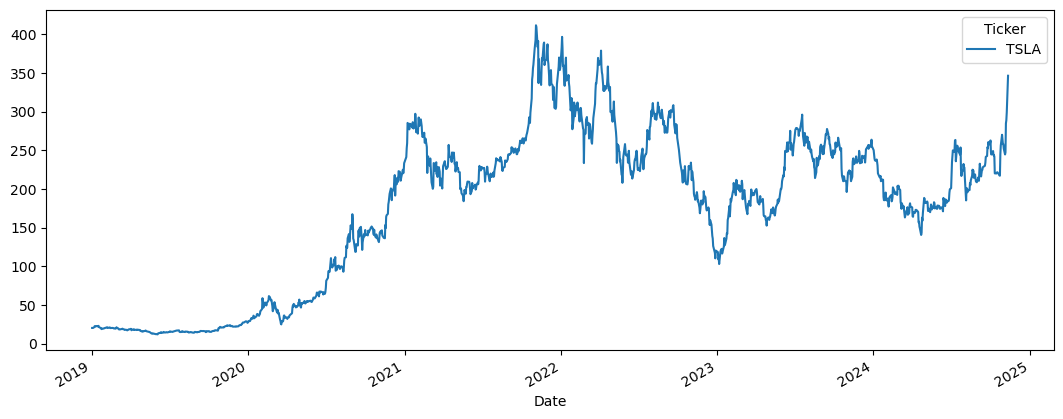

In [6]:
df_tesla['Open'].plot(figsize=(13,5))

In [12]:
df_tesla['Open:10 days rolling']=df_tesla['Open'].rolling(window=10,min_periods=1).mean()
df_tesla['Open:20 days rolling']=df_tesla['Open'].rolling(window=20,min_periods=1).mean()
df_tesla['Open:30 days rolling']=df_tesla['Open'].rolling(window=30,min_periods=1).mean()

<Axes: xlabel='Date'>

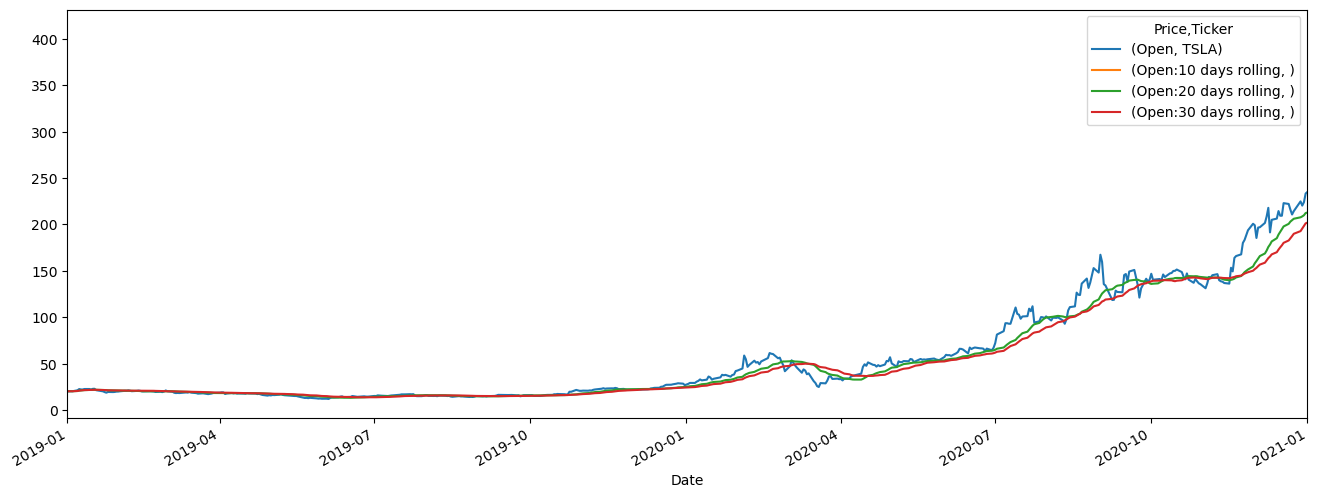

In [13]:
df_tesla[['Open','Open:10 days rolling','Open:20 days rolling','Open:30 days rolling']].plot(xlim=['2019-01-01','2021-01-01'],figsize=(16,6))

In [14]:
# CMA Cummulative Moving Average
'''
open    CMA
12       
13       (12+13)/2
11       (12+13+11)/3
15       (12+13+11+15)/4
'''

'\nopen    CMA\n12       \n13       (12+13)/2\n11       (12+13+11)/3\n15       (12+13+11+15)/4\n'

<Axes: xlabel='Date'>

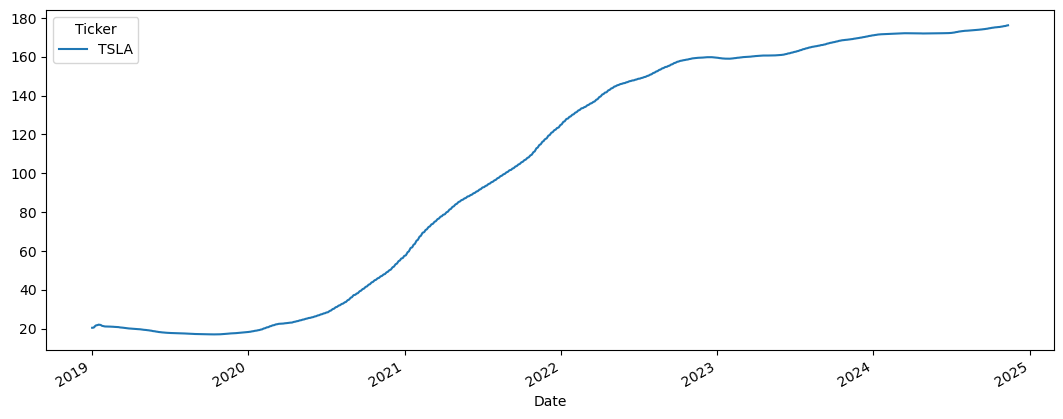

In [16]:
# Expanding
# CMA

df_tesla['Open'].expanding().mean().plot(figsize=(13,5))

In [17]:
# EMA
# ((close-prev EMA)*multliplier)+prev EMA
# multiplier = 2/(window size+1)

In [20]:
# let the smoothing factor be 0.1
df_tesla['EMA_0.1']=df_tesla['Open'].ewm(alpha=0.1,adjust=False).mean()

<Axes: xlabel='Date'>

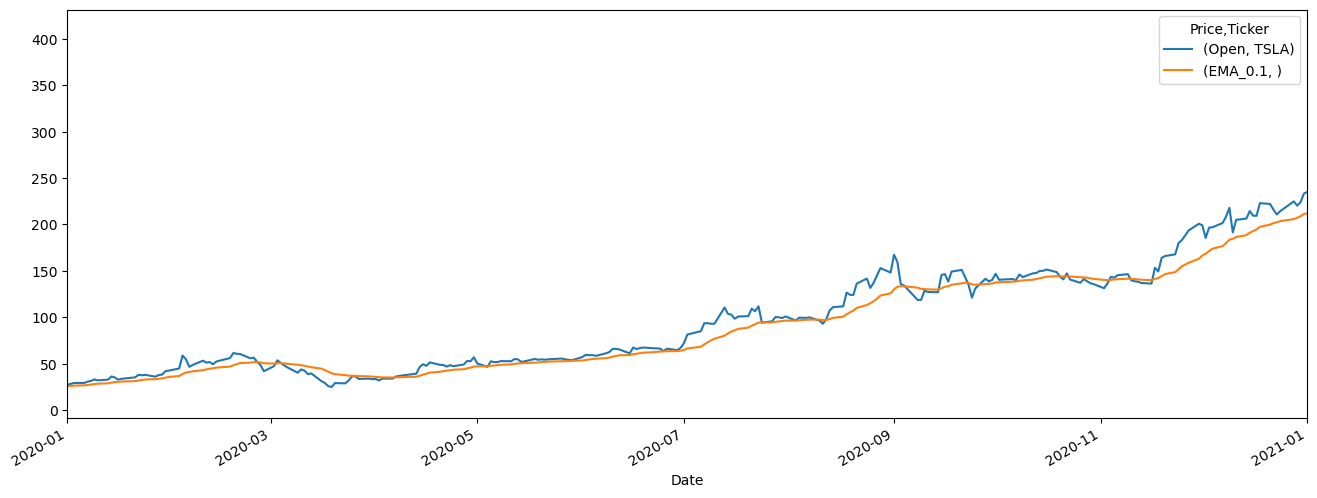

In [21]:
df_tesla[['Open','EMA_0.1']].plot(xlim=['2020-01-01','2021-01-01'],figsize=(16,6))

In [22]:
# EWMA Exponential Weighted Moving Average

# focus on current moving data
# gives weight to the current data
# adv -> removing lags

# 

In [ ]:
# ARIMA
# AR AutoRegression + Itegrated + Moving Average